In [1]:
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np

df = pd.read_csv('hpv_prevalence.csv')
df['age_group'] = np.floor(df.age/10 - 30/10) # 10 year age groups
df['age_group'] = np.where(df.age_group < 3, df.age_group, 3) # joining 70 year-olds with 60-70 group

In [2]:
# Let's model
with pm.Model() as model:
    # Priors
    alpha = pm.Normal("intercept", mu=0, sigma=1)
    b_c = pm.Normal("beta_contraceptives", mu=0, sigma=1)
    b_s = pm.Normal("beta_smoking", mu=0, sigma=1)
    b_age1 = pm.Normal("beta_agegroup1", mu=0, sigma=1)
    b_age2 = pm.Normal("beta_agegroup2", mu=0, sigma=1)
    b_age3 = pm.Normal("beta_agegroup3", mu=0, sigma=1)
    b_n_ps = pm.Normal("beta_n_partners", mu=0, sigma=1)
    # Age groups
    age1 = (df.age_group == 1).astype(int)
    age2 = (df.age_group == 2).astype(int)
    age3 = (df.age_group == 3).astype(int)
    # Logistic regression
    logit_p = (
        alpha + b_c * df.hormonal_contrcptvs + b_s * df.smoking + b_age1 * age1  + b_age2 * age2 + b_age3 * age3 + b_n_ps * df.nr_of_sex_partners
    )
    # Likelihood
    p = pm.Deterministic("p", pm.math.sigmoid(logit_p))
    y_obs = pm.Bernoulli("y_obs", p=p, observed=df.hrhpv_prevalence)

    # Sampling
    idata = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)
    
# Summary
az.summary(idata, round_to=2) 

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta_contraceptives, beta_smoking, beta_agegroup1, beta_agegroup2, beta_agegroup3, beta_n_partners]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 34 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,-1.93,0.38,-2.67,-1.23,0.01,0.0,3115.62,4257.42,1.0
beta_contraceptives,0.18,0.23,-0.23,0.63,0.00,0.0,7110.51,5566.24,1.0
beta_smoking,0.23,0.27,-0.31,0.71,0.00,0.0,9144.09,5414.86,1.0
beta_agegroup1,-0.50,0.28,-1.04,0.03,0.00,0.0,5621.21,5153.16,1.0
beta_agegroup2,-0.61,0.31,-1.20,-0.03,0.00,0.0,4126.38,5179.92,1.0
...,...,...,...,...,...,...,...,...,...
p[995],0.14,0.03,0.09,0.19,0.00,0.0,8615.37,6882.03,1.0
p[996],0.12,0.02,0.08,0.16,0.00,0.0,9556.81,6433.64,1.0
p[997],0.13,0.04,0.07,0.20,0.00,0.0,7085.16,6444.95,1.0
p[998],0.12,0.02,0.08,0.16,0.00,0.0,9963.15,6433.07,1.0


We can also add some plots to visualise, in my notebook somehow they did not show the plots.
Some plots similar in our lectures:

                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
beta_contraceptives  0.183  0.228  -0.229    0.627      0.003    0.003   
beta_agegroup1      -0.496  0.285  -1.035    0.030      0.004    0.003   
beta_agegroup2      -0.608  0.313  -1.202   -0.029      0.005    0.003   
beta_agegroup3      -0.048  0.330  -0.652    0.597      0.006    0.003   
beta_n_partners     -0.012  0.048  -0.101    0.078      0.001    0.001   

                     ess_bulk  ess_tail  r_hat  
beta_contraceptives    7111.0    5566.0    1.0  
beta_agegroup1         5621.0    5153.0    1.0  
beta_agegroup2         4126.0    5180.0    1.0  
beta_agegroup3         3404.0    4638.0    1.0  
beta_n_partners        4184.0    5208.0    1.0  


NameError: name 'plt' is not defined

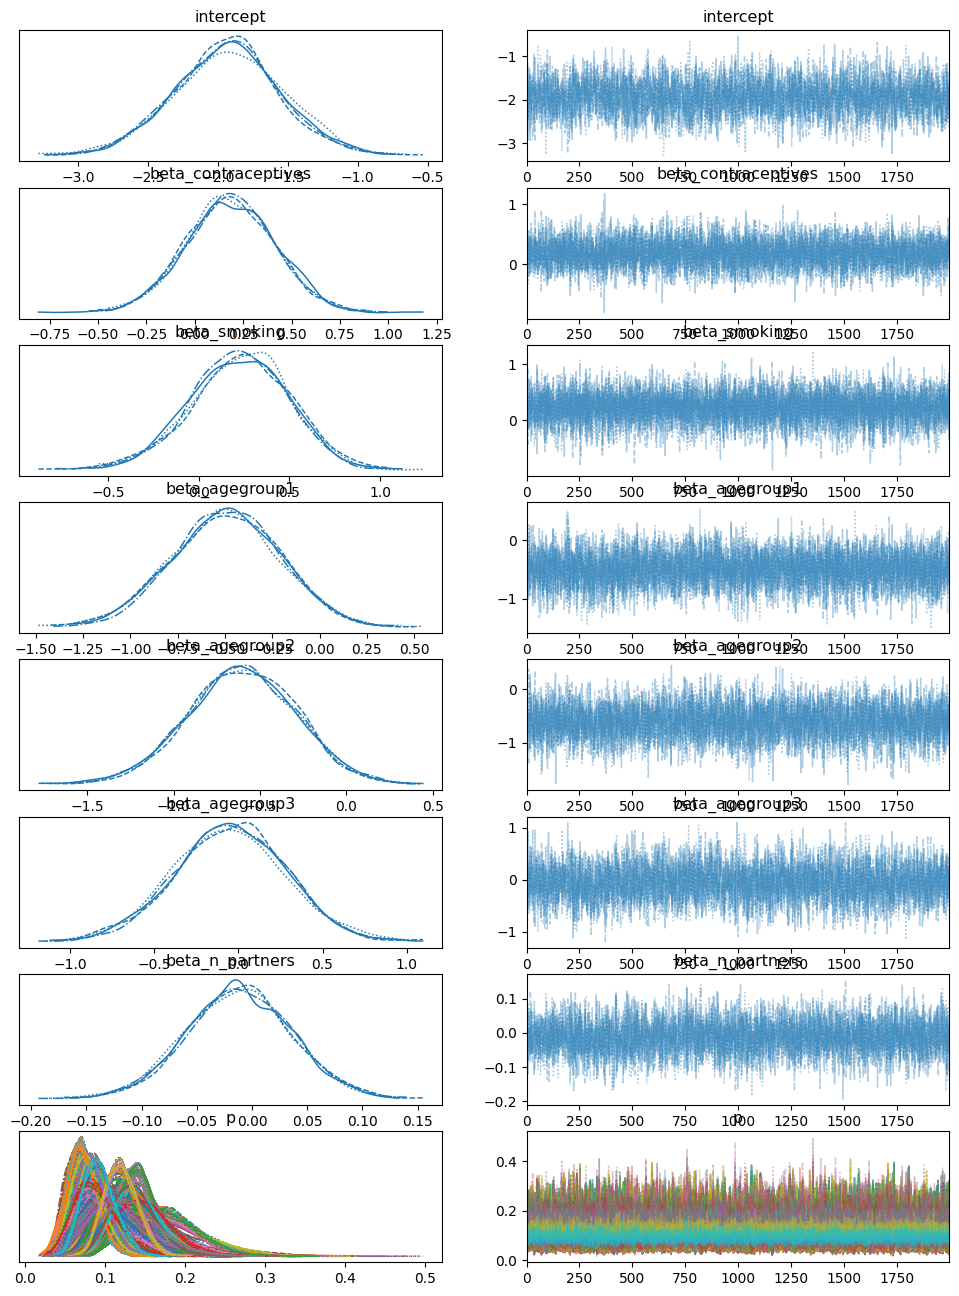

In [3]:
print(az.summary(idata,var_names=['beta_contraceptives','beta_agegroup1','beta_agegroup2', 'beta_agegroup3', 'beta_n_partners']))
az.plot_trace(idata)
plt.show()